In [39]:
import numpy as np
import pandas as pd
import xarray as xr
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [29]:
air_temp =  xr.open_dataset('../ta_MLS_L3_v03-3x_200408-201012.nc')
df = air_temp.to_dataframe()

In [30]:
df.head()

time_bnds  lat_bnds  lon_bnds  ta
bnds lat   lon plev     time                                                  
0    -89.0 0.0 100000.0 2004-08-17 00:00:00     1674.0     -90.0      -2.5 NaN
                        2004-09-16 12:00:00     1705.0     -90.0      -2.5 NaN
                        2004-10-17 00:00:00     1735.0     -90.0      -2.5 NaN
                        2004-11-16 12:00:00     1766.0     -90.0      -2.5 NaN
                        2004-12-17 00:00:00     1796.0     -90.0      -2.5 NaN

In [31]:
df.describe()

,time_bnds,lat_bnds,lon_bnds,ta
count,2.295216e+07,2.295216e+07,2.295216e+07,1.362890e+07
mean,2.845636e+03,0.000000e+00,1.775000e+02,2.281771e+02
std,6.766276e+02,5.196794e+01,1.039431e+02,2.016593e+01
min,1.674000e+03,-9.000000e+01,-2.500000e+00,1.787903e+02
25%,2.251000e+03,-4.450000e+01,8.750000e+01,2.140441e+02
50%,2.845500e+03,0.000000e+00,1.775000e+02,2.241957e+02
75%,3.439000e+03,4.450000e+01,2.675000e+02,2.435092e+02
max,4.018000e+03,9.000000e+01,3.575000e+02,2.937771e+02


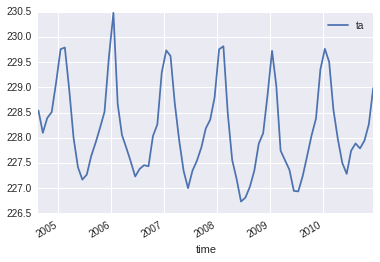

In [32]:
air_temp.mean(dim=["lat", "lon", "plev", "bnds"])["ta"].to_dataframe().plot()

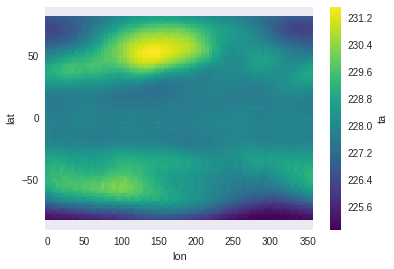

In [33]:
air_temp.mean(dim=["time", "plev", "bnds"], skipna=True)["ta"].plot()

In [34]:
mean_temps = air_temp.mean(dim=["time", "plev", "bnds"], skipna=True)
mean_temps["lon"] = mean_temps["lon"]-180 # adjust the longitude to agree with basemap

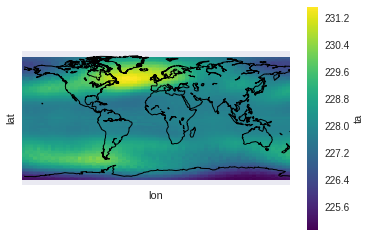

In [35]:
map = Basemap()

map.drawcoastlines()

mean_temps["ta"].plot()
plt.show()

In [36]:
mean_temps_sub =  mean_temps.where(mean_temps.lat < 49).where(mean_temps.lat > 31).where(mean_temps.lon > -126).where(mean_temps.lon < -104)

In [37]:
 mean_temps.sel(lat=[-89.0, -87.0])

<xarray.Dataset>
Dimensions:    (lat: 2, lon: 72)
Coordinates:
  * lat        (lat) float64 -89.0 -87.0
  * lon        (lon) float64 -180.0 -175.0 -170.0 -165.0 -160.0 -155.0 ...
Data variables:
    time_bnds  float64 2.846e+03
    lat_bnds   (lat) float64 -89.0 -87.0
    lon_bnds   (lon) float64 0.0 5.0 10.0 15.0 20.0 25.0 30.0 35.0 40.0 45.0 ...
    ta         (lat, lon) float64 nan nan nan nan nan nan nan nan nan nan ...

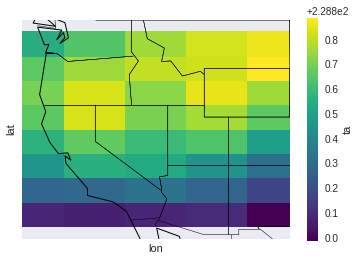

In [40]:
map = Basemap(llcrnrlon=-126, llcrnrlat=31, urcrnrlon=-104, urcrnrlat=49)
mean_temps_sub["ta"].plot()
map.drawstates()
map.drawcountries()
map.drawcoastlines()
plt.show()

In [48]:
from tempfile import NamedTemporaryFile
from IPython.display import HTML
from matplotlib import animation


VIDEO_TAG = """<video controls>
 <source src="data:video/x-m4v;base64,{0}" type="video/mp4">
 Your browser does not support the video tag.
</video>"""

def anim_to_html(anim):
    if not hasattr(anim, '_encoded_video'):
        with NamedTemporaryFile(suffix='.mp4') as f:
            anim.save(f.name, fps=20, extra_args=['-vcodec', 'libx264'])
            video = open(f.name, "rb").read()
        anim._encoded_video = video.encode("base64")
    
    return VIDEO_TAG.format(anim._encoded_video)

## need ffmpeg or mencoder

def display_animation(anim):
    plt.close(anim._fig)
    return HTML(anim_to_html(anim))

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

In [49]:

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

# call our new function to display the animation
display_animation(anim)